In [1]:
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
import torch
from PIL import Image
from tqdm import tqdm
import pandas as pd
import os
from IPython.display import display, HTML

In [12]:
# pip install salesforce-lavis

In [2]:
import torch
from PIL import Image
from lavis.models import load_model_and_preprocess
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
# load sample image
#raw_image = Image.open("../../docs/_static/merlion.png").convert("RGB")
#display(raw_image.resize((596, 437)))


In [ ]:
# import torch
# from lavis.models import load_model_and_preprocess
# # loads BLIP-2 pre-trained model
# model, vis_processors, _ = load_model_and_preprocess(name="blip2_t5", model_type="pretrain_flant5xxl", is_eval=True, device=device)
# # prepare the image


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    name="blip_caption", model_type="large_coco", is_eval=True, device=device
)
# uncomment to use base model
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip_caption", model_type="base_coco", is_eval=True, device=device
# )
vis_processors.keys()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.66G/1.66G [00:22<00:00, 81.1MB/s]


dict_keys(['train', 'eval'])

In [6]:
path = '/content/drive/MyDrive/Target_Images/23_July_News'
os.chdir(path)
image_files_23 = {}


for website in os.listdir():
    image_files_23[website] = [i for i in os.listdir(website) if not (i.endswith('.js') or i.endswith('.css') or i.endswith('.svg') or i.endswith('.gif'))]


image_files_23.keys()


dict_keys(['Daily Mail_23072024', 'BBC_23072024', 'Fox News_23072024', 'CNN_23072024', 'NY Times_23072024', 'Washington Post_23072024', 'Globo_23072024', 'The Guardian_23072024', 'NPR_23072024'])

In [8]:

for key, img_list in image_files_23.items():
    path = '/content/drive/MyDrive/Target_Images/23_July_News/' + key + '/'
    print(f"{key} {len(img_list)} images are to be processed")

    if key != 'BBC_23072024':
        continue

    with open('/content/drive/MyDrive/Caching/' + key + '.csv', 'w') as f:
        f.write("Index,Image,Caption\n")

    for idx, image_file in tqdm(enumerate(img_list), total=len(img_list), desc=f"Processing {key}"):
        try:
            # Open image
            image = Image.open(path + image_file).convert('RGB')
            image = vis_processors["eval"](image).unsqueeze(0).to(device)
            # Process image
            #pixel_values = processor(images=image, return_tensors="pt").pixel_values.to('cuda')

            # Generate caption
            #generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
            #generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
            generated_caption = model.generate({"image": image})

            #add to result
            print(f"{idx + 1},{image_file},{generated_caption}\n")
            with open('/content/drive/MyDrive/Caching/' + key + '.csv', 'a') as f:
                f.write(f"{idx + 1},{image_file},{generated_caption}\n")

        except Exception as e:
            with open('/content/drive/MyDrive/Caching/' + key + '.csv', 'a') as f:
                f.write(f"{idx + 1},{image_file},error processing image\n")
            print(f"Error processing {image_file}: {e}")

    print(f"{key} {len(img_list)} images processed")
    print(".....................................")

Daily Mail_23072024 523 images are to be processed
BBC_23072024 39 images are to be processed


Processing BBC_23072024:   3%|▎         | 1/39 [00:33<21:09, 33.42s/it]

1,0326d4b0-48bd-11ef-9e1c-3b4a473456a6.jpg.webp,['a woman standing at a podium in front of a crowd']



Processing BBC_23072024:   5%|▌         | 2/39 [01:03<19:21, 31.38s/it]

2,p0jcz5sq.jpg.webp,['a group of women standing next to each other']



Processing BBC_23072024:   8%|▊         | 3/39 [01:34<18:47, 31.32s/it]

3,68d9f420-48a6-11ef-b74c-bb483a802c97.jpg.webp,['a woman standing in front of a microphone']



Processing BBC_23072024:  10%|█         | 4/39 [01:59<16:41, 28.61s/it]

4,p0jcydgs.jpg.webp,['a man in a suit playing a trumpet']



Processing BBC_23072024:  13%|█▎        | 5/39 [02:26<15:54, 28.06s/it]

5,e5345030-4827-11ef-96a8-e710c6bfc866.jpg.webp,['a close up of two men hugging each other']



Processing BBC_23072024:  15%|█▌        | 6/39 [03:17<19:41, 35.82s/it]

6,04c58b60-48cf-11ef-99ed-67d4618c723e.jpg.webp,['a group of people walking down a sidewalk']



Processing BBC_23072024:  18%|█▊        | 7/39 [03:46<17:57, 33.67s/it]

7,fe4dbb10-48cc-11ef-9e1c-3b4a473456a6.jpg.webp,['a woman is holding a circuit board in her hand']



Processing BBC_23072024:  21%|██        | 8/39 [04:13<16:21, 31.65s/it]

8,976be5d0-48c6-11ef-8959-b3ec3b0bdfcd.jpg.webp,['a group of three men standing next to each other']



Processing BBC_23072024:  23%|██▎       | 9/39 [04:41<15:14, 30.50s/it]

9,fbb8b820-48a7-11ef-806b-adaabf2803a5.jpg.webp,['a woman in a white shirt speaking into a microphone']



Processing BBC_23072024:  26%|██▌       | 10/39 [05:21<16:12, 33.54s/it]

10,a2cb0130-4863-11ef-9e1c-3b4a473456a6.jpg.webp,['a close up of the olympic rings on top of the eiffel tower']



Processing BBC_23072024:  28%|██▊       | 11/39 [05:50<14:59, 32.12s/it]

11,p0jd20ty.jpg.webp,['a view of a courtyard with a building in the background']



Processing BBC_23072024:  31%|███       | 12/39 [06:23<14:34, 32.37s/it]

12,4dd56800-4836-11ef-96a8-e710c6bfc866.jpg.webp,['a man in a suit and tie speaking into a microphone']



Processing BBC_23072024:  33%|███▎      | 13/39 [06:49<13:12, 30.47s/it]

13,4ec4b750-48b5-11ef-a1c2-097f0d35f879.jpg.webp,['a bird is standing on a rock near the water']



Processing BBC_23072024:  36%|███▌      | 14/39 [07:18<12:27, 29.90s/it]

14,1dde5150-4874-11ef-b74c-bb483a802c97.jpg.webp,['a woman talking on a cell phone in a park']



Processing BBC_23072024:  38%|███▊      | 15/39 [07:51<12:17, 30.74s/it]

15,5d6dff00-482e-11ef-9e1c-3b4a473456a6.jpg.webp,['a helicopter is parked on the ground with other helicopters in the background']



Processing BBC_23072024:  41%|████      | 16/39 [08:21<11:41, 30.50s/it]

16,cd687d10-4808-11ef-b74c-bb483a802c97.jpg.webp,['a man giving a speech at a podium']



Processing BBC_23072024:  44%|████▎     | 17/39 [08:50<11:04, 30.22s/it]

17,cdaf5060-48d4-11ef-b74c-bb483a802c97.png.webp,['a man with a beard sitting down']



Processing BBC_23072024:  46%|████▌     | 18/39 [09:20<10:30, 30.00s/it]

18,p0jchx33.jpg.webp,['a view of a rocky area with trees and rocks']



Processing BBC_23072024:  49%|████▊     | 19/39 [09:57<10:45, 32.29s/it]

19,0560ada0-4845-11ef-b74c-bb483a802c97.jpg.webp,['a woman standing at a podium in front of a crowd']



Processing BBC_23072024:  51%|█████▏    | 20/39 [10:26<09:55, 31.33s/it]

20,00b226b0-47b6-11ef-b74c-bb483a802c97.jpg.webp,['a woman with glasses standing on the side of a street']



Processing BBC_23072024:  54%|█████▍    | 21/39 [10:54<09:06, 30.34s/it]

21,cd7fcd00-48b5-11ef-a1c2-097f0d35f879.jpg.webp,['a man and a young man are looking at something']



Processing BBC_23072024:  56%|█████▋    | 22/39 [11:24<08:32, 30.15s/it]

22,c4ea6a20-4882-11ef-8457-9d0b44a6ddb3.jpg.webp,['a woman in a graduation gown holding a baby']



Processing BBC_23072024:  59%|█████▉    | 23/39 [11:52<07:51, 29.47s/it]

23,b121fc00-45e0-11ef-9e1c-3b4a473456a6.jpg.webp,['three women sitting next to each other on a bench']



Processing BBC_23072024:  62%|██████▏   | 24/39 [12:16<06:57, 27.84s/it]

24,6e37c680-4456-11ef-8b31-9dc28c2e0724.png.webp,['a group of men running in a race']



Processing BBC_23072024:  64%|██████▍   | 25/39 [12:46<06:38, 28.44s/it]

25,ab4d4d40-48c2-11ef-8959-b3ec3b0bdfcd.jpg.webp,['a building with a sign that says westminster magistrates court']



Processing BBC_23072024:  67%|██████▋   | 26/39 [13:11<05:56, 27.40s/it]

26,33d0fc70-4837-11ef-8286-a5f3613185c4.jpg.webp,['a man sitting in front of a computer monitor']



Processing BBC_23072024:  69%|██████▉   | 27/39 [13:49<06:09, 30.77s/it]

27,p0jchx86.jpg.webp,['a large body of water with a small island in the middle of it']



Processing BBC_23072024:  72%|███████▏  | 28/39 [14:25<05:54, 32.21s/it]

28,11f9d0d0-47fc-11ef-a7d7-5b45cff4e3d7.jpg.webp,['a row of blue and yellow planes sitting on top of an airport tarmac']



Processing BBC_23072024:  74%|███████▍  | 29/39 [14:54<05:13, 31.33s/it]

29,p0jc685v.jpg.webp,['a group of boats floating in a body of water']



Processing BBC_23072024:  77%|███████▋  | 30/39 [15:24<04:36, 30.75s/it]

30,p0jcf831.jpg.webp,['a woman in a white bikini posing for a picture']



Processing BBC_23072024:  79%|███████▉  | 31/39 [15:51<03:57, 29.71s/it]

31,p0j53vjd.jpg.webp,['a woman is doing a trick in the air']



Processing BBC_23072024:  82%|████████▏ | 32/39 [16:17<03:19, 28.56s/it]

32,p0h74xqg.jpg.webp,['the white house with stars on a colorful background']



Processing BBC_23072024:  85%|████████▍ | 33/39 [16:45<02:51, 28.50s/it]

33,p0h74xp9.jpg.webp,['a hammock with a cell phone in it']



Processing BBC_23072024:  87%|████████▋ | 34/39 [17:19<02:30, 30.19s/it]

34,grey-placeholder.png,['a group of people standing on top of a snow covered slope']



Processing BBC_23072024:  90%|████████▉ | 35/39 [17:46<01:56, 29.17s/it]

35,p0jchp6h.jpg.webp,['a jar of honey with a cloth on top']



Processing BBC_23072024:  92%|█████████▏| 36/39 [18:16<01:28, 29.36s/it]

36,p0hzj391.jpg.webp,['a white plate topped with meat and lettuce']



Processing BBC_23072024:  95%|█████████▍| 37/39 [18:43<00:57, 28.74s/it]

37,p0jbv23y.jpg.webp,['a close up of a black bear in a forest']



Processing BBC_23072024: 100%|██████████| 39/39 [19:12<00:00, 29.55s/it]

38,p0j9bt66.jpg.webp,['a view of a town with a mountain in the background']

Error processing BBC_23072024.csv: cannot identify image file '/content/drive/MyDrive/Target_Images/23_July_News/BBC_23072024/BBC_23072024.csv'
BBC_23072024 39 images processed
.....................................
Fox News_23072024 23 images are to be processed
CNN_23072024 38 images are to be processed
NY Times_23072024 57 images are to be processed
Washington Post_23072024 23 images are to be processed
Globo_23072024 44 images are to be processed
The Guardian_23072024 78 images are to be processed
NPR_23072024 58 images are to be processed


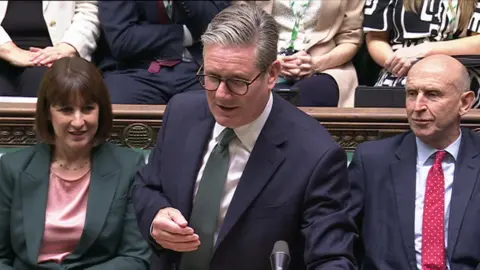

In [11]:
from PIL import Image
from IPython.display import display, HTML

#display(HTML("<h2>Image Caption</h2><br>"))
results = pd.read_csv('/content/drive/MyDrive/Caching/BBC_23072024.csv')
results.columns = ['index','image','description']
results.head()
display(HTML(f"<p>{results['description'][10]}</p>"))
display(Image.open(f"/content/drive/MyDrive/Target_Images/23_July_News/BBC_23072024/{results['image'][10]}"))



In [ ]:
# model.generate({"image": image, "prompt": "Question: which city is this? Answer:"})
# # 'singapore'
# model.generate({
#     "image": image,
#     "prompt": "Question: which city is this? Answer: singapore. Question: why?"})
# # 'it has a statue of a merlion'
# # prepare context prompt
# context = [
#     ("which city is this?", "singapore"),
#     ("why?", "it has a statue of a merlion"),
# ]
# question = "where is the name merlion coming from?"
# template = "Question: {} Answer: {}."
# prompt = " ".join([template.format(context[i][0], context[i][1]) for i in range(len(context))]) + " Question: " + question + " Answer:"
# print(prompt)
# # generate model's response
# model.generate({"image": image,"prompt": prompt})
# # 'merlion is a portmanteau of mermaid and lion'